# Máquina de Atwood
© 2020
Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza  

---  

## Enunciado
1. Obtenga con la ecuación de Euler-Lagrange la ecuación de la dinámica. 
Simplifique el problema considerando que la poleas de radio \\(R\\) tiene masa nula (\\(M=0\\)).
2. Compare las aceleraciones con las obtenidas usando ecuaciones de Newton.

![](marion_fig2_1a.png)

## Análisis preliminar
- Dos coordenadas generalizadas: $x_1,x_2$
- Potencial externo: debido a la aceleración gravitatoria
- Vínculo: cuerda de longitud $l$ impone $x_1+ x_2 + \pi R = l$ siendo $R$ el radio de la polea que se la considera sin masa.

## Resolución simbólica en el formalismo Lagrangiano
A continuación se obtiene la ecuación Lagrangiana, sino que también se resolverá la correspondiente de Euler-Lagrange con las funciones del módulo **sympy**.

In [1]:
# módulo de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

### Variables

In [3]:
# Defino los parámetros físicos del sistema
M, R, m1, m2, g, l = sym.symbols('M, R, m_1, m_2, g, l', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
x1 = sym.Function('x_1')(t) # posición pesa 1: x = x(t)
x2 = sym.Function('x_2')(t) # posición pesa 2: y = y(t)
x2_vinculo = (l- sym.pi* R)- x1  # posición pesa 2: definida por el vínculo
x2_vinculo

Si por cuestiones de presentación se quiere escribir como ecuación es posible, pero la variable a utilizar segirá siendo `y_vinculo`.

In [4]:
sym.Eq(x2, x2_vinculo)

### Energía cinética

In [5]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
T_m1 = unMedio* m1* x1.diff(t)**2 # diff: derivada, **: potencia
T_m2 = unMedio* m2* x2_vinculo.diff(t)**2
T = T_m1 + T_m2
T.simplify() # simplify: simplifica usando factor común y otras operaciones

### Energía potencial

In [6]:
# Energía potencial
V_m1 = m1* g* (-x1)
V_m2 = m2* g* (-x2_vinculo)
V = V_m1 + V_m2
V.simplify()

### Lagrangiano
$$
L(x,\dot{x}) = T(\dot{x})- V(x)
$$

In [7]:
L = T- V
L.simplify()

### Ecuación de Euler-Lagrange

Primero calculamos el que llamo lado izquierdo
$$
\frac{\partial}{\partial x} L
$$

In [8]:
ladoIzquierdo = L.diff(x1)
ladoIzquierdo

Luego el derecho
$$\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{x}} L$$

In [9]:
ladoDerecho = L.diff(x1.diff(t)).diff(t) # primero deriva respecto a x punto y luego a t
ladoDerecho

Con ambos se escribe la ecuación de Euler-Lagrange
$$
\frac{\partial}{\partial x} L - \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{x}} L = 0
$$

In [10]:
eulerLagrange = sym.Eq(ladoIzquierdo- ladoDerecho, 0) # ecuación igualando a cero
eulerLagrange.simplify()

Esta es una ecuación diferencial lineal de segundo orden homogena.

### Despeje
Buscamos resolver numéricamente esta ecuación diferencial de segundo orden.
Podemos despejar $\ddot{x}$

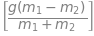

In [11]:
sym.solve(eulerLagrange, x1.diff(t,2) ) # entrega una lista con los posibles despejes en función de x punto punto (derivada de 2.o orden con t)

y asignar este resultado a una variable para uso posterior

In [12]:
aceleracion_x1 = sym.solve(eulerLagrange,x1.diff(t,2))[0] # [0] toma el único elemento de la lista

Más adelante en el curso ejercitaremos el dar valores numéricos a los parámetros y condiciones iniciales del sistema para poder calcular $x(t)$.

## Contemplando la masa de la polea

Si bien el centro de masa de la polea no se desplaza su rotación agrega un término a la energía cinética en función de la velocidad angular \\(\omega\\).

In [13]:
ω = sym.Symbol('\omega') # declaramos ω como variable

In [14]:
I_cilindro = unMedio* M* R**2 # momento de inercia de rotación en torno a su eje de simetría longitudinal
T_rotacion = unMedio* I_cilindro* ω**2
T_rotacion

Conocemos la relación entre la velocidad angular y la tangencial que es la de la cuerda.

In [15]:
ω_xpunto = R* x1.diff(t)
sym.Eq(ω,ω_xpunto)

Hago uso de la sustitución para re-escribir la componente de energía cinética por la rotación de la polea.

In [16]:
T_rotacion = T_rotacion.subs(ω, ω_xpunto)
T_rotacion

La nueva energía cinética es ahora

In [17]:
T_p = T + T_rotacion # agrego _p para indicar con polea
T_p

El Lagrangiano

In [18]:
L_p = T_p - V
L_p

La ecuación de Euler-Lagrange

In [19]:
ladoIzquierdo_p = L_p.diff(x1)
ladoDerecho_p = L_p.diff(x1.diff(t)).diff(t) # primero deriva respecto a x punto y luego a t
eulerLagrange_p = sym.Eq(ladoIzquierdo_p - ladoDerecho_p, 0) # ecuación igualando a cero
eulerLagrange_p

Y la aceleración

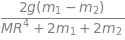

In [20]:
aceleracion_x1_p = sym.solve(eulerLagrange_p, x1.diff(t,2))[0]
aceleracion_x1_p